In [3]:
import numpy as np

all_categories = ['Anorak', 'Blazer','Blouse', 'Bomber', 'Button-Down', 'Cardigan',
              'Flannel', 'Henley', 'Halter', 'Hoodie', 'Jacket', 'Jersey', 'Parka',
              'Peacoat', 'Poncho ', 'Sweater', 'Tank', 'Tee', 'Top', 'Turtleneck', 'Capris',
              'Chinos','Culottes', 'Cutoffs', 'Gauchos', 'Jeans', 'Jeggings', 'Jodhpurs', 'Joggers', 'Leggings',
                  'Sarong', 'Shorts', 'Skirt', 'Sweatpants',
              'Sweatshorts', 'Trunks', 'Caftan', 'Eastern', 'Coat', 'Coverup', 'Dress', 'Jumpsuit', 'Kaftan', 'Kimono',
                  'Nightdress', 'Onesie', 'Robe', 'Romper', 'Shirtdress', 'Sundress']

allowed_categories = ['Button-Down', 'Hoodie', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Top',
                      'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants', 'Eastern']

allowed_inds = np.array([all_categories.index(cat) for cat in allowed_categories])

In [3]:
classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# allowed_categories = ['Blazer', 'Button-Down',
#                    'Henley', 'Jacket', 'Tank', 'Tee',
#                    'Chinos','Jeans', 'Joggers', 'Shorts']

# allowed_categories = ['Blazer', 'Button-Down',
#                    'Henley', 'Jacket', 'Sweater', 'Tank', 'Tee', 'Turtleneck',
#                    'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants', 'Coat']

for i, cls in enumerate(all_categories, start=1):
    print(f"{i}) {cls}: {np.count_nonzero(classes == i)}")

# for i, cls in enumerate(all_categories):
#     if cls in allowed_categories:
#         print(f"{i+1}) {cls}: {np.count_nonzero(classes == i+1)}")


# Consider re-adding:
# Blazer, Cardigan, Coat

1) Anorak: 0
2) Blazer: 0
3) Blouse: 0
4) Bomber: 0
5) Button-Down: 85
6) Cardigan: 0
7) Flannel: 0
8) Henley: 0
9) Halter: 0
10) Hoodie: 180
11) Jacket: 73
12) Jersey: 0
13) Parka: 0
14) Peacoat: 0
15) Poncho : 0
16) Sweater: 100
17) Tank: 5
18) Tee: 784
19) Top: 0
20) Turtleneck: 0
21) Capris: 0
22) Chinos: 0
23) Culottes: 0
24) Cutoffs: 0
25) Gauchos: 0
26) Jeans: 14
27) Jeggings: 0
28) Jodhpurs: 0
29) Joggers: 25
30) Leggings: 0
31) Sarong: 0
32) Shorts: 22
33) Skirt: 0
34) Sweatpants: 39
35) Sweatshorts: 0
36) Trunks: 0
37) Caftan: 0
38) Eastern: 229
39) Coat: 0
40) Coverup: 0
41) Dress: 0
42) Jumpsuit: 0
43) Kaftan: 0
44) Kimono: 0
45) Nightdress: 0
46) Onesie: 0
47) Robe: 0
48) Romper: 0
49) Shirtdress: 0
50) Sundress: 0


In [8]:
# #filter by category
#
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
#
# # settings
# h, w = 10, 10        # for raster image
# ncols = 10  # array of sub-plots
# figsize = [50, 50]     # figure size, inches
#
# cat_ind = 5
# count = np.count_nonzero(classes == cat_ind)
#
# # prep (x,y) for extra plotting on selected sub-plots
# xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
# ys = np.abs(np.sin(xs))           # absolute of sine
#
# # create figure (fig), and array of axes (ax)
# fig, ax = plt.subplots(ncols=ncols, nrows=count//ncols + 1, figsize=figsize)
#
# paths = []
# for i, cls in enumerate(classes):
#     if cls == cat_ind:
#         paths.append(labels[i])
# print(paths)
#
# # plot simple raster image on each sub-plot
# for i, (axi, label) in enumerate(zip(ax.flat, paths)):
#     img = cv2.cvtColor(cv2.imread(label), cv2.COLOR_BGR2RGB)
#     axi.imshow(img)
#
# plt.tight_layout(True)
# plt.show()

In [ ]:
def get_comp_rec(f, color_feats, labels):
    compatible_cats_dict = {
        "Jacket": ['Hoodie', 'Jacket', 'Jeans', 'Shorts', 'Sweatpants'],
        "Tee": ['Hoodie', 'Jacket', 'Jeans', 'Shorts', 'Sweatpants']
    }

    compatible_colors_dict = {
        "Jacket": {
            "brown"
        },
        "Tee": {
            "white": ['black', 'black', 'black', 'red', 'red']
        }

    }

    if len(f) == 2:  # without clf
        deep_feat, color_feat = f
    else:  # with clf
        class_n, deep_feat, color_feat = f

    colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

    euclid_dists = dict()
    for color in colors:
        pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
        _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
        euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    query_color = max(euclid_dists, key=euclid_dists.get)

Loading model...
Loading model freeze=False/lr=0.001/29_epochs
Loading model Done. Time: 0.446 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
Extracting image feature Done. Time: 0.181 sec
Extracting image feature...
Extracting image feature Done. Time: 0.130 sec
Extracting image feature...
Extracting image feature Done. Time: 0.132 sec
Extracting image feature...
Extracting image feature Done. Time: 0.126 sec
Extracting image feature...
Extracting image feature Done. Time: 0.130 sec
Extracting image feature...
Extracting image feature Done. Time: 0.127 sec
Extracting image feature...
Extracting image feature Done. Time: 0.129 sec
Extracting image feature...
Extracting image feature Done. Time: 0.127 sec
compatible_cats: [10 11 26 29 34]
Extracting image feature...
Extracting image feature Done. Time: 0.130 sec
Extracting image feature...
Extracting image feature Done. Time: 0.129 sec
[('/home/ma02526/ResNet/base/scrapped/elo/

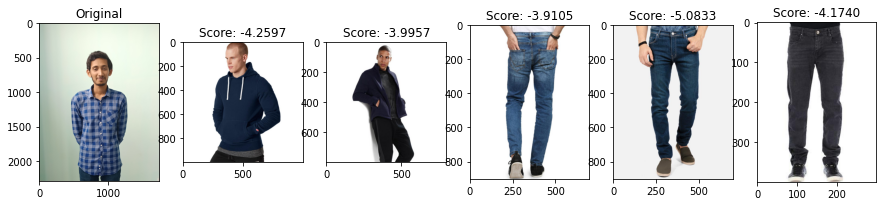

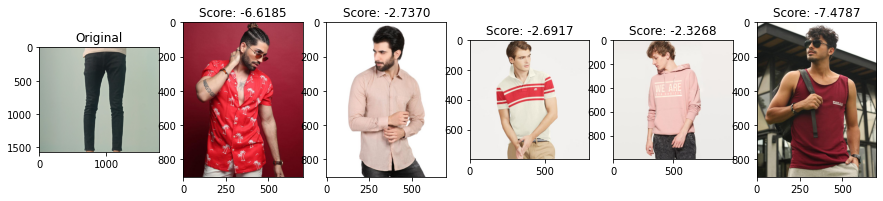

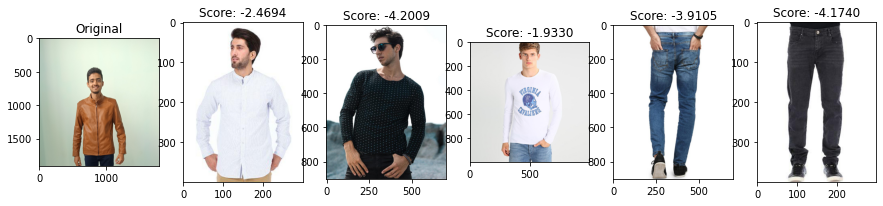

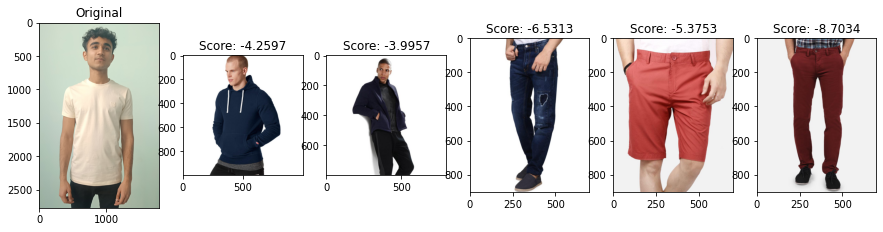

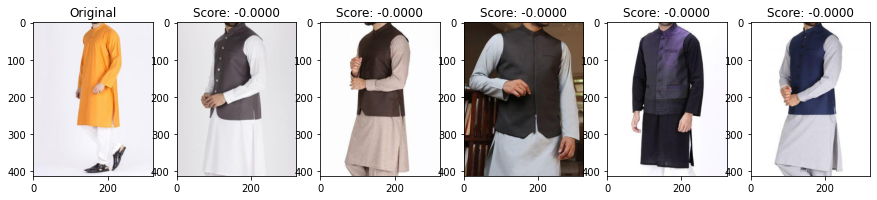

In [5]:
from retrieval import *
from config import *
import matplotlib.pyplot as plt
import os
import random
plt.rcParams['figure.figsize'] = [10, 5]

# example = "/home/ma02526/ResNet/base/colors/white.jpg"
# example = "/home/ma02526/ResNet/base/colors/black.jpg"
examples = ["hu_men/IMG_20200120_145822.jpg", #- talha's beige round neck tshirt
            "hu_men/IMG_20200130_152400.jpg", #- saad saleem's brown leather jacket
            "hu_men/IMG_20200120_145759.jpg", #- talha's black skinny jeans
            "hu_men/IMG_20200130_122739.jpg", #- mursalin's pink shirt
            "hu_men/IMG_20200130_123311.jpg", #- burhan's dark blue checked shirt
            "scrapped/jdot/2f1a88faa0112ca51d8f320b935f6bfc9c05829d.jpg",
            "scrapped/jdot/8dfe1fea818660ff809f7c2acd8abfcae2a84e70.jpg", #- mustard yellow shalwar kameez
            "scrapped/jdot/9d7209a5aa1747f3c82a939ec039244bc608c67d.jpg"]
example = examples[4]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# for example in examples:
#     f = dump_single_feature(example, extractor, custom=True, with_clsf=True)
#
#     colors = ['white', 'black', 'dark_red', 'red', 'dark_blue']
#
#     euclid_dists = dict()
#     for color in colors:
#         pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#         _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#         euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     query_color = max(euclid_dists, key=euclid_dists.get)
#     print(f'\n{example}: {query_color}\n')



f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

compatible_cats = ['Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Sweatpants']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

complementary_colors = ['black', 'black', 'denim_blue', 'denim_blue', 'denim_blue']


color_feats_of_complementary_colors = dict()
for complementary_color in list(set(complementary_colors)):
    pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    color_feats_of_complementary_colors[complementary_color] = color_feat
# print(color_feats_of_complementary_colors)

classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# color_feats_of_compatible = color_feats[inds_of_compatible]
#
# for color_feat in color_feats_of_compatible:
#     print(color_feat.shape)

result = []
for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
    inds_of_compatible = np.where(classes == compatible_cat)[0]
    # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
    color_feats_of_compatible = color_feats[inds_of_compatible]

    compatibility_scores = []
    for color_feat in color_feats_of_compatible:
        # compatibility_score = []
        # for complementary_color in complementary_colors_dict[query_color]:
        #     # print(f'\n complementary color {complementary_color}')
        #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
        #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
        #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
        #     # print(f'similarity: {similarity}')
        #     compatibility_score.append(similarity)

        compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                        np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
        compatibility_scores.append(compatibility_score)

    compatibility_scores = np.array(compatibility_scores)
    ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
    max_score = np.max(compatibility_scores, axis=0).item()
    # print(f'compatibility scores: {compatibility_scores}')
    # print(f'inds of compatible: {inds_of_compatible}')
    # print(f'shape: {compatibility_scores.shape}')
    # print(f'max: {np.max(compatibility_scores, axis=0)}')
    # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
    # print(f'ind={ind}')
    # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
    result.append((labels[ind], max_score))

print(result)
# print(complementary_colors)
visualize(example, result)

example = examples[2]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# for example in examples:
#     f = dump_single_feature(example, extractor, custom=True, with_clsf=True)
#
#     colors = ['white', 'black', 'dark_red', 'red', 'dark_blue']
#
#     euclid_dists = dict()
#     for color in colors:
#         pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#         _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#         euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     query_color = max(euclid_dists, key=euclid_dists.get)
#     print(f'\n{example}: {query_color}\n')



f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

# compatible_cats = ['Hoodie', 'Jacket', 'Sweater', 'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants']
compatible_cats = ['Button-Down', 'Button-Down', 'Sweater', 'Tee', 'Tank']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

complementary_colors = ['red', 'pink', 'pink', 'pink', 'red']
color_feats_of_complementary_colors = dict()
for complementary_color in list(set(complementary_colors)):
    pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    color_feats_of_complementary_colors[complementary_color] = color_feat
# print(color_feats_of_complementary_colors)

classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# color_feats_of_compatible = color_feats[inds_of_compatible]
#
# for color_feat in color_feats_of_compatible:
#     print(color_feat.shape)

result = []
for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
    inds_of_compatible = np.where(classes == compatible_cat)[0]
    # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
    color_feats_of_compatible = color_feats[inds_of_compatible]

    compatibility_scores = []
    for color_feat in color_feats_of_compatible:
        # compatibility_score = []
        # for complementary_color in complementary_colors_dict[query_color]:
        #     # print(f'\n complementary color {complementary_color}')
        #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
        #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
        #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
        #     # print(f'similarity: {similarity}')
        #     compatibility_score.append(similarity)

        compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                        np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
        compatibility_scores.append(compatibility_score)

    compatibility_scores = np.array(compatibility_scores)
    ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
    max_score = np.max(compatibility_scores, axis=0).item()
    # print(f'compatibility scores: {compatibility_scores}')
    # print(f'inds of compatible: {inds_of_compatible}')
    # print(f'shape: {compatibility_scores.shape}')
    # print(f'max: {np.max(compatibility_scores, axis=0)}')
    # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
    # print(f'ind={ind}')
    # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
    result.append((labels[ind], max_score))

print(result)
visualize(example, result)

example = examples[1]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# for example in examples:
#     f = dump_single_feature(example, extractor, custom=True, with_clsf=True)
#
#     colors = ['white', 'black', 'dark_red', 'red', 'dark_blue']
#
#     euclid_dists = dict()
#     for color in colors:
#         pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#         _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#         euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     query_color = max(euclid_dists, key=euclid_dists.get)
#     print(f'\n{example}: {query_color}\n')



f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

# compatible_cats = ['Hoodie', 'Jacket', 'Sweater', 'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants']
compatible_cats = ['Button-Down', 'Sweater', 'Tee', 'Jeans', 'Sweatpants']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

complementary_colors = ['white', 'black', 'white', 'denim_blue', 'denim_blue']
color_feats_of_complementary_colors = dict()
for complementary_color in list(set(complementary_colors)):
    pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    color_feats_of_complementary_colors[complementary_color] = color_feat
# print(color_feats_of_complementary_colors)

classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# color_feats_of_compatible = color_feats[inds_of_compatible]
#
# for color_feat in color_feats_of_compatible:
#     print(color_feat.shape)

result = []
for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
    inds_of_compatible = np.where(classes == compatible_cat)[0]
    # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
    color_feats_of_compatible = color_feats[inds_of_compatible]

    compatibility_scores = []
    for color_feat in color_feats_of_compatible:
        # compatibility_score = []
        # for complementary_color in complementary_colors_dict[query_color]:
        #     # print(f'\n complementary color {complementary_color}')
        #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
        #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
        #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
        #     # print(f'similarity: {similarity}')
        #     compatibility_score.append(similarity)

        compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                        np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
        compatibility_scores.append(compatibility_score)

    compatibility_scores = np.array(compatibility_scores)
    ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
    max_score = np.max(compatibility_scores, axis=0).item()
    # print(f'compatibility scores: {compatibility_scores}')
    # print(f'inds of compatible: {inds_of_compatible}')
    # print(f'shape: {compatibility_scores.shape}')
    # print(f'max: {np.max(compatibility_scores, axis=0)}')
    # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
    # print(f'ind={ind}')
    # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
    result.append((labels[ind], max_score))

print(result)
print(complementary_colors)
visualize(example, result)

example = examples[0]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# for example in examples:
#     f = dump_single_feature(example, extractor, custom=True, with_clsf=True)
#
#     colors = ['white', 'black', 'dark_red', 'red', 'dark_blue']
#
#     euclid_dists = dict()
#     for color in colors:
#         pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#         _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#         euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     query_color = max(euclid_dists, key=euclid_dists.get)
#     print(f'\n{example}: {query_color}\n')



f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

# compatible_cats = ['Hoodie', 'Jacket', 'Sweater', 'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants']
compatible_cats = ['Hoodie', 'Jacket', 'Jeans', 'Shorts', 'Sweatpants']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

complementary_colors = ['black', 'black', 'black', 'red', 'red']

color_feats_of_complementary_colors = dict()
for complementary_color in list(set(complementary_colors)):
    pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    color_feats_of_complementary_colors[complementary_color] = color_feat
# print(color_feats_of_complementary_colors)

classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# color_feats_of_compatible = color_feats[inds_of_compatible]
#
# for color_feat in color_feats_of_compatible:
#     print(color_feat.shape)

result = []
for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
    inds_of_compatible = np.where(classes == compatible_cat)[0]
    # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
    color_feats_of_compatible = color_feats[inds_of_compatible]

    compatibility_scores = []
    for color_feat in color_feats_of_compatible:
        # compatibility_score = []
        # for complementary_color in complementary_colors_dict[query_color]:
        #     # print(f'\n complementary color {complementary_color}')
        #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
        #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
        #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
        #     # print(f'similarity: {similarity}')
        #     compatibility_score.append(similarity)

        compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                        np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
        compatibility_scores.append(compatibility_score)

    compatibility_scores = np.array(compatibility_scores)
    ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
    max_score = np.max(compatibility_scores, axis=0).item()
    # print(f'compatibility scores: {compatibility_scores}')
    # print(f'inds of compatible: {inds_of_compatible}')
    # print(f'shape: {compatibility_scores.shape}')
    # print(f'max: {np.max(compatibility_scores, axis=0)}')
    # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
    # print(f'ind={ind}')
    # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
    result.append((labels[ind], max_score))

print(result)
# print(complementary_colors)
visualize(example, result)

example = examples[6]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

wt_coats_pths = ["scrapped/jdot/0df6793aa25b13e2e51b70712dc6f74c5315159f.jpg",
               "scrapped/jdot/0ec9cddb6910c4bba113679432cf48c598b77969.jpg",
               "scrapped/jdot/79167f934e159c376287442b8b15ad6307d69485.jpg",
               "scrapped/jdot/2aa032fee6c7c26c2a9ee33e485a1ed073e770e5.jpg",
                "scrapped/jdot/8c3c1d6e07379f990da69b1063b670537e665fb6.jpg",
                "scrapped/jdot/9af8e094e8a01be72b683e11d71eb95cd643a500.jpg",
                "scrapped/jdot/77c00f9faabc9effd9c87ae54a8ab02899b6e506.jpg",
                "scrapped/jdot/3750fdf3371be975a8585ec17922a595000ee62b.jpg",
                "scrapped/jdot/30632f23d41caf94420d241bc8adf7d1ce0d9632.jpg",
                "scrapped/jdot/113572739dc25598b7206f227d1d4a5ffb220de3.jpg",
                "scrapped/jdot/a5c1a6c9461cddccaaad48ea11514a508921d521.jpg",
                "scrapped/jdot/c6e3ed830e6589b0cf346323962f001ac639dde8.jpg",
                "scrapped/jdot/cec68c5a5f2f210f232e5cee53f8bb9f24a884e6.jpg",
                "scrapped/jdot/cf2148e5b9aa851d841cae1c46e86bc7ae534c94.jpg",
                "scrapped/jdot/e7de361d6749da57e27871eb4134a613100b8a50.jpg",
                "scrapped/jdot/e55f37c44fc333d49a3b2b3e9e6168989579839b.jpg",
                "scrapped/jdot/ec092da3e715a1fde55b0409be251eb4c4fa2423.jpg",
                "scrapped/jdot/fa93d7d9cd5f02d3eeb061adf2cbb358a373a908.jpg"]

# colors = ['white', 'black', 'denim_blue', 'brown']
#
# euclid_dists = dict()
# for color in colors:
#     pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#     _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#     euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
# query_color = max(euclid_dists, key=euclid_dists.get)
#
# compatible_cats = ['Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Sweatpants']
# compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
# print(f'compatible_cats: {compatible_cats}')
#
# complementary_colors = ['black', 'black', 'denim_blue', 'denim_blue', 'denim_blue']
#
#
# color_feats_of_complementary_colors = dict()
# for complementary_color in list(set(complementary_colors)):
#     pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
#     _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#     color_feats_of_complementary_colors[complementary_color] = color_feat
# # print(color_feats_of_complementary_colors)
#
# classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')
#
# # inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# # color_feats_of_compatible = color_feats[inds_of_compatible]
# #
# # for color_feat in color_feats_of_compatible:
# #     print(color_feat.shape)
#
# result = []
# for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
#     inds_of_compatible = np.where(classes == compatible_cat)[0]
#     # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
#     color_feats_of_compatible = color_feats[inds_of_compatible]
#
#     compatibility_scores = []
#     for color_feat in color_feats_of_compatible:
#         # compatibility_score = []
#         # for complementary_color in complementary_colors_dict[query_color]:
#         #     # print(f'\n complementary color {complementary_color}')
#         #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
#         #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
#         #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#         #     # print(f'similarity: {similarity}')
#         #     compatibility_score.append(similarity)
#
#         compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
#                                         np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
#         compatibility_scores.append(compatibility_score)
#
#     compatibility_scores = np.array(compatibility_scores)
#     ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
#     max_score = np.max(compatibility_scores, axis=0).item()
#     # print(f'compatibility scores: {compatibility_scores}')
#     # print(f'inds of compatible: {inds_of_compatible}')
#     # print(f'shape: {compatibility_scores.shape}')
#     # print(f'max: {np.max(compatibility_scores, axis=0)}')
#     # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
#     # print(f'ind={ind}')
#     # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
#     result.append((labels[ind], max_score))
#



result = list(zip(random.sample(wt_coats_pths,k=5), (5 * [-0.0])))

print(result)
visualize(example, result)


Loading model...
Loading model freeze=False/lr=0.001/29_epochs
Loading model Done. Time: 0.436 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/hu_men/IMG_20200130_152400.jpg
Custom: True
Extracting image feature Done. Time: 0.176 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/white.jpg
Custom: True
Extracting image feature Done. Time: 0.135 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/black.jpg
Custom: True
Extracting image feature Done. Time: 0.136 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/dark_red.jpg
Custom: True
Extracting image feature Done. Time: 0.133 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/red.jpg
Custom: True
Extracting image feature Done. Time: 0.133 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/dark_blue.jpg
Custom: True
Extracti

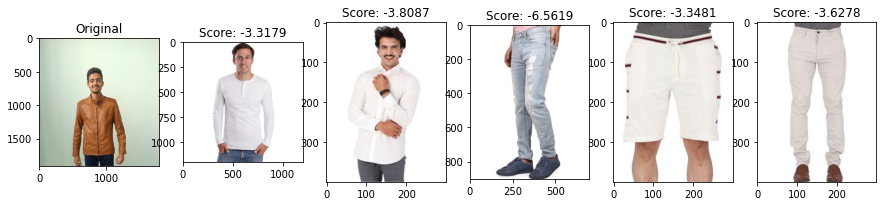

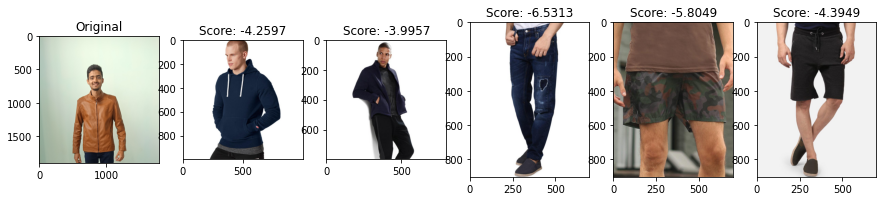

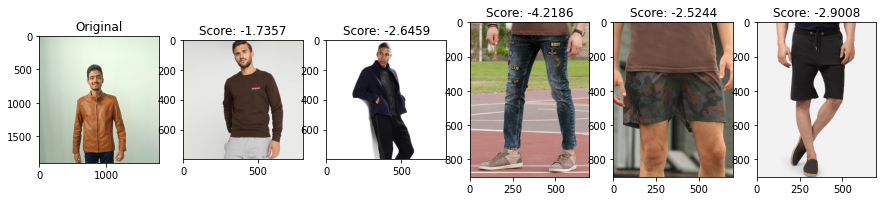

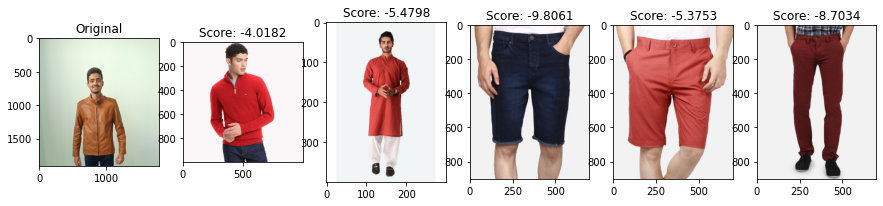

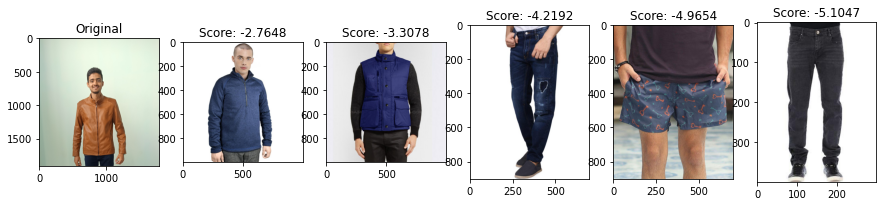

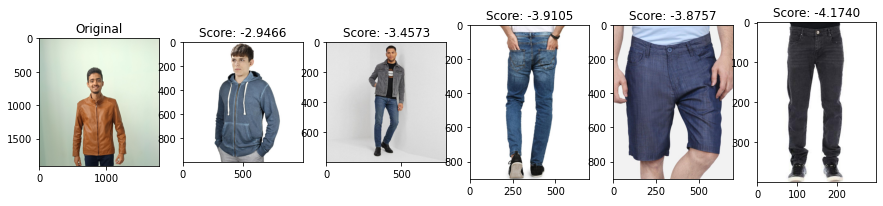

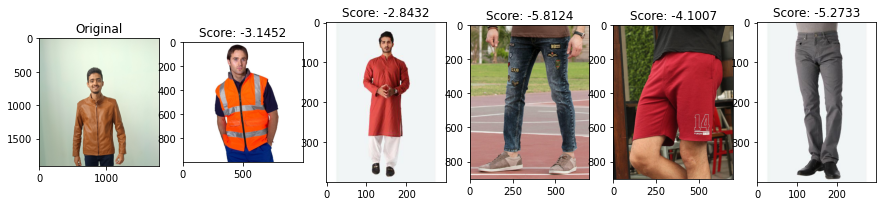

In [6]:
from retrieval import *
from config import *
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [10, 5]

# example = "/home/ma02526/ResNet/base/colors/white.jpg"
# example = "/home/ma02526/ResNet/base/colors/black.jpg"
examples = ["hu_men/IMG_20200120_145822.jpg", #- talha's beige round neck tshirt
            "hu_men/IMG_20200130_152400.jpg", #- saad saleem's brown leather jacket
            "hu_men/IMG_20200120_145759.jpg", #- talha's black skinny jeans
            "hu_men/IMG_20200130_122739.jpg", #- mursalin's pink shirt
            "hu_men/IMG_20200130_123311.jpg", #- burhan's dark blue checked shirt
            "scrapped/jdot/2f1a88faa0112ca51d8f320b935f6bfc9c05829d.jpg",
            "scrapped/jdot/8dfe1fea818660ff809f7c2acd8abfcae2a84e70.jpg", #- mustard yellow shalwar kameez
            "scrapped/jdot/9d7209a5aa1747f3c82a939ec039244bc608c67d.jpg"]
example = examples[1]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)


f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

# compatible_cats = ['Hoodie', 'Jacket', 'Sweater', 'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants']
compatible_cats = ['Hoodie', 'Jacket', 'Jeans', 'Shorts', 'Sweatpants']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

# complementary_colors = ['black', 'dark_red', 'black', 'black', 'dark_red']
# complementary_colors = ['black', 'dark_red', 'dark_red', 'dark_red', 'dark_red']
# complementary_colors = ['dark_blue', 'dark_blue', 'dark_blue', 'dark_blue', 'dark_blue']
complementary_colors_list = [[color]*5 for color in colors]
# print(complementary_colors_list)

for complementary_colors in complementary_colors_list:
    color_feats_of_complementary_colors = dict()
    for complementary_color in list(set(complementary_colors)):
        pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
        _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
        color_feats_of_complementary_colors[complementary_color] = color_feat
    # print(color_feats_of_complementary_colors)

    classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

    # inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
    # color_feats_of_compatible = color_feats[inds_of_compatible]
    #
    # for color_feat in color_feats_of_compatible:
    #     print(color_feat.shape)

    result = []
    for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
        inds_of_compatible = np.where(classes == compatible_cat)[0]
        # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
        color_feats_of_compatible = color_feats[inds_of_compatible]

        compatibility_scores = []
        for color_feat in color_feats_of_compatible:
            # compatibility_score = []
            # for complementary_color in complementary_colors_dict[query_color]:
            #     # print(f'\n complementary color {complementary_color}')
            #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
            #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
            #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
            #     # print(f'similarity: {similarity}')
            #     compatibility_score.append(similarity)

            compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                            np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

        #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
            compatibility_scores.append(compatibility_score)

        compatibility_scores = np.array(compatibility_scores)
        ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
        max_score = np.max(compatibility_scores, axis=0).item()
        # print(f'compatibility scores: {compatibility_scores}')
        # print(f'inds of compatible: {inds_of_compatible}')
        # print(f'shape: {compatibility_scores.shape}')
        # print(f'max: {np.max(compatibility_scores, axis=0)}')
        # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
        # print(f'ind={ind}')
        # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
        result.append((labels[ind], max_score))

    print(result)
    print(complementary_colors)
    visualize(example, result)

Loading model...
Loading model freeze=False/lr=0.001/29_epochs
Loading model Done. Time: 0.434 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/hu_men/IMG_20200120_145822.jpg
Custom: True
Extracting image feature Done. Time: 0.197 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/white.jpg
Custom: True
Extracting image feature Done. Time: 0.135 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/black.jpg
Custom: True
Extracting image feature Done. Time: 0.135 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/dark_red.jpg
Custom: True
Extracting image feature Done. Time: 0.133 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/red.jpg
Custom: True
Extracting image feature Done. Time: 0.132 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/colors/dark_blue.jpg
Custom: True
Extracti

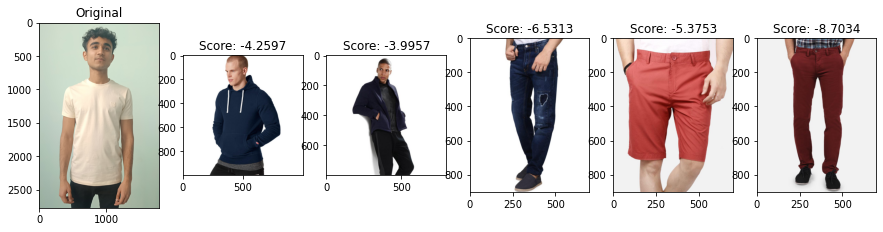

In [5]:
from retrieval import *
from config import *
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.figsize'] = [10, 5]

# example = "/home/ma02526/ResNet/base/colors/white.jpg"
# example = "/home/ma02526/ResNet/base/colors/black.jpg"
examples = ["hu_men/IMG_20200120_145822.jpg", #- talha's beige round neck tshirt
            "hu_men/IMG_20200130_152400.jpg", #- saad saleem's brown leather jacket
            "hu_men/IMG_20200120_145759.jpg", #- talha's black skinny jeans
            "hu_men/IMG_20200130_122739.jpg", #- mursalin's pink shirt
            "hu_men/IMG_20200130_123311.jpg", #- burhan's dark blue checked shirt
            "scrapped/jdot/2f1a88faa0112ca51d8f320b935f6bfc9c05829d.jpg",
            "scrapped/jdot/8dfe1fea818660ff809f7c2acd8abfcae2a84e70.jpg", #- mustard yellow shalwar kameez
            "scrapped/jdot/9d7209a5aa1747f3c82a939ec039244bc608c67d.jpg"]
example = examples[0]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

# for example in examples:
#     f = dump_single_feature(example, extractor, custom=True, with_clsf=True)
#
#     colors = ['white', 'black', 'dark_red', 'red', 'dark_blue']
#
#     euclid_dists = dict()
#     for color in colors:
#         pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
#         _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
#         euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
#
#     query_color = max(euclid_dists, key=euclid_dists.get)
#     print(f'\n{example}: {query_color}\n')



f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

colors = ['white', 'black', 'dark_red', 'red', 'dark_blue', 'denim_blue',
          'brown']

complementary_colors_dict = {'white': ['black', 'dark_red']}

euclid_dists = dict()
for color in colors:
    pth = os.path.join(DATASET_BASE, 'colors', f'{color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    euclid_dists[color] = get_similarity(f[2], np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

query_color = max(euclid_dists, key=euclid_dists.get)

# compatible_cats = ['Hoodie', 'Jacket', 'Sweater', 'Chinos','Jeans', 'Joggers', 'Shorts', 'Sweatpants']
compatible_cats = ['Hoodie', 'Jacket', 'Jeans', 'Shorts', 'Sweatpants']
compatible_cats = np.array([all_categories.index(cat) + 1 for cat in compatible_cats])
print(f'compatible_cats: {compatible_cats}')

complementary_colors = ['black', 'black', 'black', 'red', 'red']

color_feats_of_complementary_colors = dict()
for complementary_color in list(set(complementary_colors)):
    pth = os.path.join(DATASET_BASE, 'colors', f'{complementary_color}.jpg')
    _, _, color_feat = dump_single_feature(pth, extractor, custom=True, with_clsf=True)
    color_feats_of_complementary_colors[complementary_color] = color_feat
# print(color_feats_of_complementary_colors)

classes = np.load('/home/ma02526/ResNet/base/custom_all_class.npy')

# inds_of_compatible = np.where(np.isin(classes, compatible_cats) == True)[0]
# color_feats_of_compatible = color_feats[inds_of_compatible]
#
# for color_feat in color_feats_of_compatible:
#     print(color_feat.shape)

result = []
for compatible_cat, complementary_color in zip(compatible_cats, complementary_colors):
    inds_of_compatible = np.where(classes == compatible_cat)[0]
    # print(f'compatible cat {compatible_cat}, inds_of_compatible{inds_of_compatible}')
    color_feats_of_compatible = color_feats[inds_of_compatible]

    compatibility_scores = []
    for color_feat in color_feats_of_compatible:
        # compatibility_score = []
        # for complementary_color in complementary_colors_dict[query_color]:
        #     # print(f'\n complementary color {complementary_color}')
        #     # print(f'color_feats_of_complementary_color: {color_feats_of_complementary_colors[complementary_color].shape}')
        #     similarity = get_similarity(color_feats_of_complementary_colors[complementary_color],
        #                                 np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])
        #     # print(f'similarity: {similarity}')
        #     compatibility_score.append(similarity)

        compatibility_score = get_similarity(color_feats_of_complementary_colors[complementary_color],
                                        np.expand_dims(color_feat, axis=0), DISTANCE_METRIC[1])

    #     compatibility_scores.append(np.squeeze(np.array(compatibility_score)))
        compatibility_scores.append(compatibility_score)

    compatibility_scores = np.array(compatibility_scores)
    ind = inds_of_compatible[np.argmax(compatibility_scores, axis=0)].item()
    max_score = np.max(compatibility_scores, axis=0).item()
    # print(f'compatibility scores: {compatibility_scores}')
    # print(f'inds of compatible: {inds_of_compatible}')
    # print(f'shape: {compatibility_scores.shape}')
    # print(f'max: {np.max(compatibility_scores, axis=0)}')
    # print(f'argmax: {np.argmax(compatibility_scores, axis=0)}')
    # print(f'ind={ind}')
    # print(f'cat: {compatible_cat}, img: {labels[ind]}\n')
    result.append((labels[ind], max_score))

print(result)
# print(complementary_colors)
visualize(example, result)

In [33]:
from retrieval import *
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# example = "/home/ma02526/ResNet/base/colors/white.jpg"
# example = "/home/ma02526/ResNet/base/colors/black.jpg"
examples = ["hu_men/IMG_20200120_145822.jpg", #- talha's beige round neck tshirt
            "hu_men/IMG_20200130_152400.jpg", #- saad saleem's brown leather jacket
            "hu_men/IMG_20200120_145759.jpg", #- talha's black skinny jeans
            "hu_men/IMG_20200130_122739.jpg", #- mursalin's pink shirt
            "hu_men/IMG_20200130_123311.jpg", #- burhan's dark blue checked shirt
            "scrapped/jdot/2f1a88faa0112ca51d8f320b935f6bfc9c05829d.jpg",
            "scrapped/jdot/8dfe1fea818660ff809f7c2acd8abfcae2a84e70.jpg", #- mustard yellow shalwar kameez
            "scrapped/jdot/9d7209a5aa1747f3c82a939ec039244bc608c67d.jpg"]
example = examples[0]

extractor = load_test_model(with_clsf=True)

# deep_feats, color_feats, labels = load_feat_db()
deep_feats, color_feats, labels = load_feat_db(custom=True)

f = dump_single_feature(example, extractor, custom=True, with_clsf=True)

if any(list(map(lambda x: x is None, f))):
     print("Input feature is None")
     exit()

result = naive_query(f[1:], deep_feats, color_feats, labels, 5)

print("Naive query result:", result)
# visualize(example, result)

Loading model...
Loading model freeze=False/lr=0.001/29_epochs
Loading model Done. Time: 0.434 sec
Loading feature database...
Loading feature database Done. Time: 0.001 sec
Extracting image feature...
img_path: /home/ma02526/ResNet/base/hu_men/IMG_20200120_145822.jpg
Custom: True
Extracting image feature Done. Time: 0.198 sec
Doing naive query...
Doing naive query Done. Time: 0.002 sec
Naive query result: [('/home/ma02526/ResNet/base/scrapped/elo/e595ceff5581561de6069a462db737a6702da0f5.jpg', -4.168832929797235), ('/home/ma02526/ResNet/base/scrapped/furor/77906fcf947f40b7e79769de4fd9086f60cae4ba.jpg', -4.29264045424013), ('/home/ma02526/ResNet/base/scrapped/elo/8dd435f4cb52704cc676519512a5c3868f4aec83.jpg', -4.298943993143718), ('/home/ma02526/ResNet/base/scrapped/furor/ee1eb2fa967b8787b8a96b234cd95a0676dfe48c.jpg', -4.334972853662564), ('/home/ma02526/ResNet/base/scrapped/furor/75dbe92ab170f8c4c9ecbd169bea2c5f5dbd83d9.jpg', -4.352850080939946)]


In [35]:
pth = "/home/ma02526/ResNet/base/custom_all_feat.list"
with open(pth) as f:
    labels = [x.strip() for x in f.readlines()]

In [13]:
# # Check if path in eastern:
# import os
# from config import *
#
# list_bbox_eastern = os.path.join(DATASET_BASE, r'scrapped', 'list_bbox_scrapped_eastern.txt')
#
# with open(list_bbox_eastern) as fin:
#     lines = fin.readlines()[2:]
#     lines = list(filter(lambda x: len(x) > 0, lines))
#     pairs = list(map(lambda x: x.strip().split(), lines))
#     paths = set(os.path.join(DATASET_BASE, pair[0]) for pair in pairs)
#
# paths

In [15]:
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
#
# # settings
# h, w = 10, 10        # for raster image
# nrows, ncols = 10, 10  # array of sub-plots
# figsize = [50, 50]     # figure size, inches
# start_ind = 200
#
# # prep (x,y) for extra plotting on selected sub-plots
# xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
# ys = np.abs(np.sin(xs))           # absolute of sine
#
# # create figure (fig), and array of axes (ax)
# fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
#
# # for i, (axi, label, cls) in enumerate(zip(ax.flat,
# #                                           labels[:(nrows * ncols)],
# #                                           classes.flat[:(nrows * ncols)])):
# #     print(i, axi, label, cls)
#
# # plot simple raster image on each sub-plot
# # for i, axi in enumerate(ax.flat):
# for i, (axi, label, cls) in enumerate(zip(ax.flat,
#                                           labels[start_ind:start_ind + (nrows * ncols)],
#                                           classes.flat[start_ind:start_ind+ (nrows * ncols)])):
#     # i runs from 0 to (nrows*ncols-1)
#     # axi is equivalent with ax[rowid][colid]
#     # img = np.random.randint(10, size=(h,w))
#     img = cv2.cvtColor(cv2.imread(label), cv2.COLOR_BGR2RGB)
#     # axi.imshow(img, alpha=0.25)
#     axi.imshow(img)
#     # get indices of row/column
#     # rowid = i // ncols
#     # colid = i % ncols
#     # write row/col indices as axes' title for identification
#     # axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))
#     axi.set_title(all_categories[cls-1],  fontsize=60)
#
#
# plt.tight_layout(True)
# plt.show()
